In [256]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



import pandas as pd
import numpy as np

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
test=pd.read_csv('/kaggle/input/diamond-price-prediction/test.csv')

train=pd.read_csv('/kaggle/input/diamond-price-prediction/train.csv')

EDA

In [259]:
train.info()
#Here we can see that there is no null values and we can see the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [260]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [261]:
train["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [262]:
train["clarity"].value_counts()


SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [263]:

train["cut"].value_counts()



Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

## **visualization**

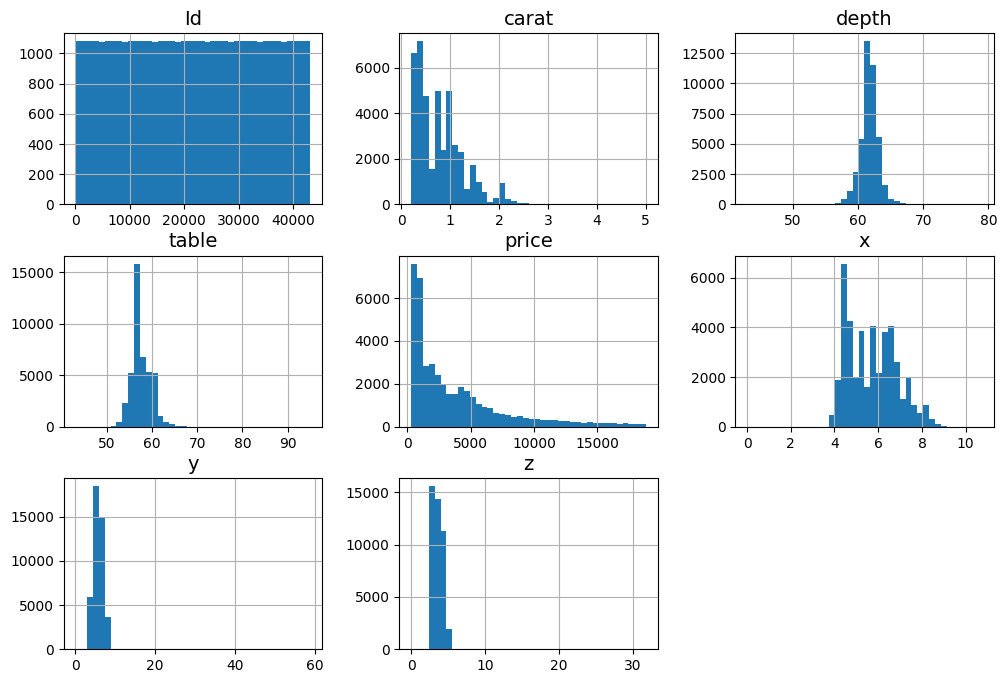

In [264]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train.hist(bins=40, figsize=(12, 8))
plt.show()

In [265]:
train.corr()['price'].sort_values(ascending = False)

#as we can see there is a high relation with price

/tmp/ipykernel_34/1939852269.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['price'].sort_values(ascending = False)


price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

In [266]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
sns.pairplot(train)

In [ ]:
train.plot.scatter(x="carat",y="price",alpha=0.2)

In [ ]:
sns.boxplot(x='price',y='color',data=train)

In [ ]:
sns.boxplot(x='price',y='cut',data=train)

In [ ]:
sns.boxplot(x='price',y='clarity',data=train)

## **Data cleaning**

In [ ]:
train_copy = train.copy()
test_copy = test.copy()
# train_copy['price'] = np.sqrt(train_copy['price'])
#train_label =train_copy["price"]
#train_copy.drop("price",axis = 1,inplace=True)




In [ ]:
train_copy.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
(train_copy == 0).sum(axis=0)

Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          17
dtype: int64

In [ ]:
train_copy['x'].fillna(train_copy['x'].median(),inplace = True)
train_copy['z'].fillna(train_copy['z'].median(),inplace = True)
train_copy['y'].fillna(train_copy['y'].median(),inplace = True)

train_copy['x'].replace(to_replace = 0, value = train_copy['x'].median(), inplace=True)
train_copy['z'].replace(to_replace = 0, value = train_copy['z'].median(), inplace=True)
train_copy['y'].replace(to_replace = 0, value = train_copy['y'].median(), inplace=True)

test_copy['x'].replace(to_replace = 0, value = test_copy['x'].median(), inplace=True)
test_copy['z'].replace(to_replace = 0, value = test_copy['z'].median(), inplace=True)
test_copy['y'].replace(to_replace = 0, value = test_copy['y'].median(), inplace=True)


### Handling Text and Categorical Attributes

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# CODE HERE
enc_train = OrdinalEncoder()
enc_test = OrdinalEncoder()
transformed_train = enc.fit_transform(train_copy[['color','cut','clarity']])
transformed_test = enc.fit_transform(test_copy[['color','cut','clarity']])

#print(transformed.toarray())
df_categorical_train = pd.DataFrame(transformed_train)
df_categorical_test = pd.DataFrame(transformed_test)

In [ ]:
df_categorical_test

,0,1,2
0,3.0,2.0,7.0
1,1.0,3.0,5.0
2,5.0,4.0,4.0
3,1.0,3.0,3.0
4,3.0,2.0,6.0
...,...,...,...
10783,4.0,2.0,4.0
10784,3.0,2.0,5.0
10785,1.0,2.0,6.0
10786,1.0,3.0,3.0


In [ ]:
train_copy = train_copy.join(df_categorical_train)
test_copy = test_copy.join(df_categorical_test)

In [ ]:

train_copy.drop("color",axis = 1,inplace=True)
train_copy.drop("cut",axis = 1,inplace=True)
train_copy.drop("clarity",axis = 1,inplace=True)

####test
test_copy.drop("color",axis = 1,inplace=True)
test_copy.drop("cut",axis = 1,inplace=True)
test_copy.drop("clarity",axis = 1,inplace=True)


In [337]:
#train_copy.drop("Id",axis = 1,inplace=True)
test_copy.drop("Id",axis = 1,inplace=True)

In [ ]:
train_copy

,carat,depth,table,price,x,y,z,0,1,2
0,1.06,61.8,57.0,4270,6.57,6.60,4.07,5.0,2.0,3.0
1,1.51,60.9,58.0,15164,7.38,7.42,4.51,3.0,3.0,7.0
2,0.32,61.3,56.0,828,4.43,4.41,2.71,2.0,2.0,5.0
3,0.53,61.2,56.0,1577,5.19,5.22,3.19,3.0,2.0,5.0
4,0.70,61.0,57.0,2596,5.76,5.72,3.50,4.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...
43147,0.52,61.5,56.0,1760,5.16,5.18,3.18,1.0,2.0,5.0
43148,0.72,62.1,59.0,3016,5.70,5.73,3.55,0.0,4.0,5.0
43149,0.44,61.5,58.0,990,4.95,4.87,3.02,5.0,3.0,6.0
43150,0.31,60.2,58.0,734,4.38,4.43,2.65,1.0,3.0,4.0


In [ ]:
train_copy.rename(columns={0:'color',1:'cut',2:"clarity"}, inplace=True)
test_copy.rename(columns={0:'color',1:'cut',2:"clarity"}, inplace=True)


In [ ]:
train_copy

,carat,depth,table,price,x,y,z,color,cut,clarity
0,1.06,61.8,57.0,4270,6.57,6.60,4.07,5.0,2.0,3.0
1,1.51,60.9,58.0,15164,7.38,7.42,4.51,3.0,3.0,7.0
2,0.32,61.3,56.0,828,4.43,4.41,2.71,2.0,2.0,5.0
3,0.53,61.2,56.0,1577,5.19,5.22,3.19,3.0,2.0,5.0
4,0.70,61.0,57.0,2596,5.76,5.72,3.50,4.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...
43147,0.52,61.5,56.0,1760,5.16,5.18,3.18,1.0,2.0,5.0
43148,0.72,62.1,59.0,3016,5.70,5.73,3.55,0.0,4.0,5.0
43149,0.44,61.5,58.0,990,4.95,4.87,3.02,5.0,3.0,6.0
43150,0.31,60.2,58.0,734,4.38,4.43,2.65,1.0,3.0,4.0


**spliting the train******

In [300]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_copy, test_size=0.2, random_state=42)
train_label = train_set['price']
test_label = test_set['price']
test_set.drop("price",axis=1,inplace=True)
train_set.drop("price",axis=1,inplace=True)

In [304]:
from sklearn.preprocessing import StandardScaler
std_scaler_train = StandardScaler()
std_scaler_test = StandardScaler()
diamond_train_scaled =std_scaler_train.fit_transform(train_label.to_frame())
diamond_test_scaled = std_scaler_test.fit_transform(test_label.to_frame())
train_label_scaled = pd.DataFrame(diamond_train_scaled)
test_label_scaled = pd.DataFrame(diamond_test_scaled)

,0
0,2.234222
1,2.490157
2,0.826708
3,-0.782350
4,0.102619
...,...
8626,0.644733
8627,-0.859614
8628,0.415739
8629,0.229189


### Training

In [288]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set.values,train_label_scaled)

LinearRegression()

In [309]:
from sklearn.metrics import mean_squared_error

train_predictions = lin_reg.predict(train_set.values)
lin_mse = mean_squared_error(train_label_scaled, train_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
print(lin_reg.score(train_set,train_label_scaled))



0.3383187319891037
0.8855404355852851


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


test_set

In [302]:
test_label_scaled

,0
0,1.204996
1,-0.282711
2,1.108200
3,-0.503066
4,-0.740928
...,...
34516,-0.366000
34517,0.561690
34518,-0.805959
34519,1.156473


In [306]:
lin_reg_test = LinearRegression()
lin_reg_test.fit(test_set.values,test_label_scaled)

LinearRegression()

In [310]:
test_predictions = lin_reg_test.predict(test_set.values)
lin_mse = mean_squared_error(test_label_scaled, test_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
print(lin_reg.score(test_set,test_label_scaled))

0.3293845715348136
0.8891317125565938


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**desetion tree**

In [311]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(train_set.values,train_label_scaled)

DecisionTreeRegressor(random_state=42)

In [323]:
price_predetion_train = tree_reg.predict(train_set.values)
tree_mse = mean_squared_error(train_label_scaled,price_predetion_train)
tree_rmse = np.sqrt(tree_mse)
score = tree_reg_test.score(train_set, price_predetion_train)
print(tree_rmse)
print(score)

0.0021273462147598293
0.9516827774642698


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


**testing set**

In [313]:
tree_reg_test = DecisionTreeRegressor(random_state = 42)
tree_reg_test.fit(test_set.values,test_label_scaled)

DecisionTreeRegressor(random_state=42)

In [321]:
price_predetion_test = tree_reg.predict(test_set.values)
tree_mse = mean_squared_error(test_label_scaled,price_predetion_test)
tree_rmse = np.sqrt(tree_mse)
score = tree_reg_test.score(test_set, price_predetion_test)
print(tree_rmse)
print(score)

0.20048477510939364
0.9583134684545531


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [315]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_set.values, train_label_scaled, scoring ="neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [316]:
print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Standard Deviation: ", tree_rmse_scores.std())

Scores:  [0.19076228 0.19208371 0.1867081  0.19639854 0.19188904 0.19947525
 0.18871013 0.18905299 0.19390789 0.18721894]
Mean:  0.19162068791713233
Standard Deviation:  0.0038645821747071035


In [317]:
scores = cross_val_score(lin_reg, train_set.values, train_label_scaled, scoring ="neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-scores)

In [318]:
print("Scores: ", lin_rmse_scores)
print("Mean: ", lin_rmse_scores.mean())
print("Standard Deviation: ", lin_rmse_scores.std())

Scores:  [0.32204832 0.35889218 0.33151067 0.32965106 0.3446295  0.34965764
 0.35272146 0.39071908 0.34698864 0.33008413]
Mean:  0.3456902680851613
Standard Deviation:  0.018790113232896494


**evaluation**

In [338]:
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(train_set.values,train_label_scaled)
final_predictions = tree_reg.predict(test_copy.values)



In [340]:
sub = test[['Id']]

In [351]:
scaled_predictions = tree_reg.predict(test_copy.values)
predictions =std_scaler_train.inverse_transform(scaled_predictions.reshape(-1,1))


In [353]:
sub['price'] = predictions

/tmp/ipykernel_34/2591737027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['price'] = predictions


In [357]:
sub.to_csv("submission.csv")

In [358]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg,train_set.values, train_label_scaled,scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [359]:
print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Standard Deviation: ", forest_rmse_scores.std())

Scores:  [0.14228429 0.13780938 0.14262283 0.14683526 0.13866545 0.14061368
 0.14199822 0.14595347 0.15057657 0.13194951]
Mean:  0.14193086586459583
Standard Deviation:  0.0049457338118178325


In [360]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'n_estimators': np.random.randint(1, 200, 10),
        'max_features': np.random.randint(1, 8, 10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_set.values, train_label_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': array([7, 6, 1, 4, 5, 5, 1, 5, 5, 4]),
                                        'n_estimators': array([ 93, 173,  82,  14, 106, 159, 184,  61, 150,  45])},
                   random_state=42, scoring='neg_mean_squared_error')

In [362]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1501838778897403 {'n_estimators': 14, 'max_features': 5}
0.1501838778897403 {'n_estimators': 14, 'max_features': 5}
0.14460909072043193 {'n_estimators': 93, 'max_features': 5}
0.14424311180972563 {'n_estimators': 159, 'max_features': 5}
0.14466533646555763 {'n_estimators': 106, 'max_features': 5}
0.14979905200444926 {'n_estimators': 45, 'max_features': 4}
0.19899753420192082 {'n_estimators': 82, 'max_features': 1}
0.14460909072043193 {'n_estimators': 93, 'max_features': 5}
0.1426775108076891 {'n_estimators': 93, 'max_features': 6}
0.1429321339678594 {'n_estimators': 93, 'max_features': 7}


In [372]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(test_copy.values)
predictions =std_scaler_train.inverse_transform(final_predictions.reshape(-1,1))

In [373]:
predictions

array([[  941.1827957 ],
       [ 2828.39784946],
       [  799.97849462],
       ...,
       [ 4396.61290323],
       [ 4952.08602151],
       [13299.56989247]])

In [376]:
sub['price'] = predictions

/tmp/ipykernel_34/2591737027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['price'] = predictions


In [377]:
sub

,Id,price
0,1,941.182796
1,2,2828.397849
2,3,799.978495
3,4,2879.591398
4,5,1100.784946
...,...,...
10783,10784,1788.397849
10784,10785,6685.881720
10785,10786,4396.612903
10786,10787,4952.086022


In [379]:
sub.to_csv("submission4.csv")